In [1]:
import sys,os
sys.path.append('../..')
from backtester import matlab, backtester
from backtester.analysis import *
import pandas as pd
import numpy as np
import scipy

%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
strategyname = 'strategy_270225'
d, info = matlab.loaddata('../../mat/'+strategyname+'.mat')


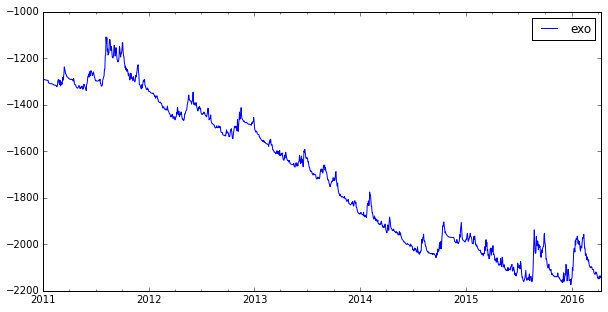

In [3]:
figsize(10,5)
d_slice=d.ix['2010':]
d_slice.plot()

## Initial strategy

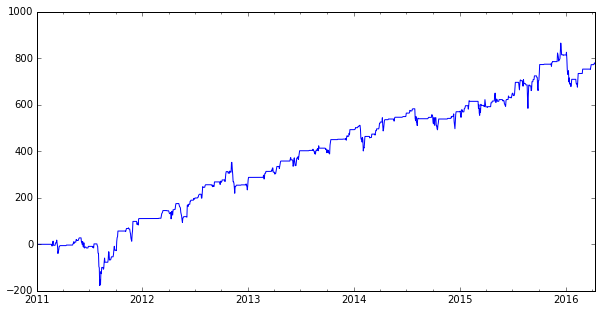

In [4]:
#Defining entry\exit rules
slow_ma = d_slice.exo.rolling(5).mean()#try period == 5
fast_ma = d_slice.exo.rolling(6).mean()#try period == 6

short_entry = CrossDown(fast_ma, slow_ma)
short_exit = (CrossUp(fast_ma, slow_ma)) 

direction = -1
pl, inposition = backtester.backtest(d_slice, short_entry, short_exit, direction )
equity, stats = backtester.stats(pl, inposition)

#X axis, initial equity curve
#Colored blue
x=equity
x.plot()

## Money management research

## Volatility

#### Median
#### Fixed position size

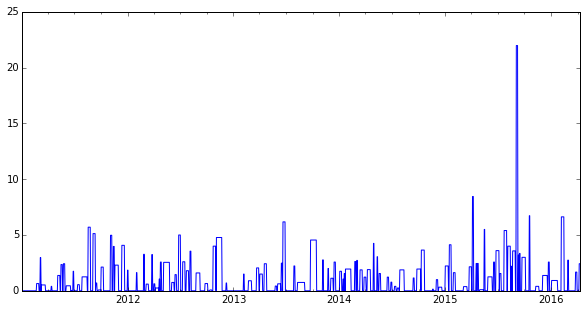

In [149]:
vola = d_slice.exo.shift(1) - d_slice.exo.shift(2)
volatility_metric = abs(vola.rolling(10).median())

values_a = []
index_a = []

for i in range(1, len(equity)):
    #
    # on opening of new position, we calculate position size
    #
    if inposition[i] == 1 and inposition[i - 1] == 0:
        current_position_size = volatility_metric[i]

    elif inposition[i] == 1 and inposition[i - 1] == 1:
        current_position_size = current_position_size

    else:
        current_position_size = 0
    values_a.append(current_position_size)
    index_a.append(equity.index[i])

possize_vola_median = pd.Series(values_a, index=[index_a])
possize_vola_median.plot()

#### Comparing equities

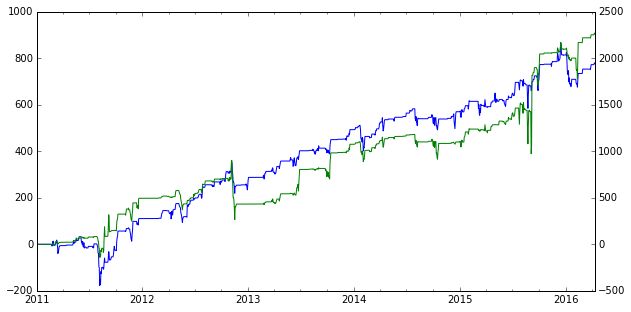

In [171]:
#X axis is initial equity curve
#Colored blue
x=equity
x.plot()

#Y axis is equity curve with position management
#Colored green
y=pl*possize_vola_median
y.dropna().cumsum().plot(secondary_y=True)

#### Median
#### Dynamic position size

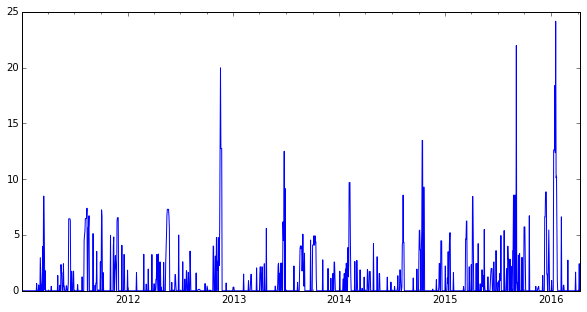

In [164]:
vola = d_slice.exo.shift(1) - d_slice.exo.shift(2)
volatility_metric = abs(vola.rolling(10).median())

values_a = []
index_a = []

# Set days in positions here, this value can be optimized
days_in_position = 5

for i in range(1, len(equity)):
    #
    # on opening of new position, we calculate position size
    #
    if inposition[i] == 1 and inposition[i - 1] == 0:
        current_position_size = volatility_metric[i]
        
    elif inposition[i] == 1 and inposition[i - days_in_position] == 1:
        current_position_size = volatility_metric[i]
        
    else:
        current_position_size = 0
        
    values_a.append(current_position_size)
    index_a.append(equity.index[i])

possize_dynamic_vola_median = pd.Series(values_a, index=[index_a])
possize_dynamic_vola_median.plot()

#### Comparing equities

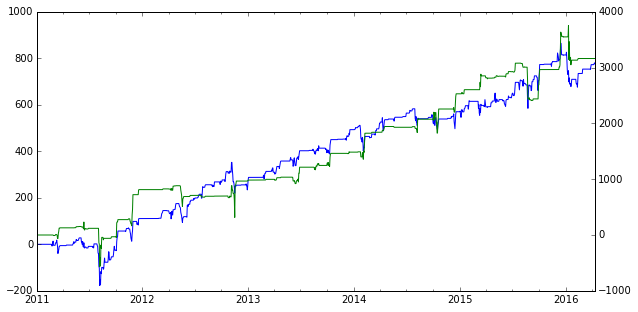

In [163]:
#X axis is initial equity curve
#Colored blue
x=equity
x.plot()

#Y axis is equity curve with position management
#Colored green
y=pl*possize_dynamic_vola_median
y.dropna().cumsum().plot(secondary_y=True)

#### ATR
#### Fixed position size

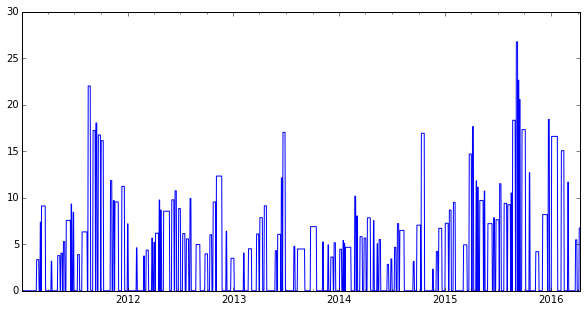

In [153]:
vola = d_slice.exo.shift(1) - d_slice.exo.shift(2)
volatility_metric = ATR(d_slice.exo,d_slice.exo,d_slice.exo,10)

values_a = []
index_a = []

for i in range(1, len(equity)):
    #
    # on opening of new position, we calculate position size
    #
    if inposition[i] == 1 and inposition[i - 1] == 0:
        current_position_size = volatility_metric[i]

    elif inposition[i] == 1 and inposition[i - 1] == 1:
        current_position_size = current_position_size

    else:
        current_position_size = 0
    values_a.append(current_position_size)
    index_a.append(equity.index[i])

possize_vola_atr = pd.Series(values_a, index=[index_a])
possize_vola_atr.plot()

### Comparing equities

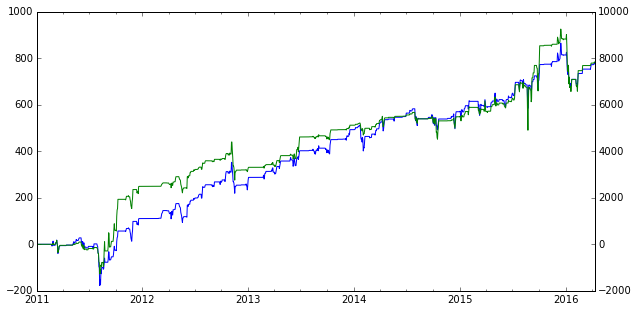

In [154]:
#X axis is initial equity curve
#Colored blue
x=equity
x.plot()

#Y axis is equity curve with position management
#Colored green
y=pl*possize_vola_atr
y.dropna().cumsum().plot(secondary_y=True)

#### ATR
#### Dynamic position size

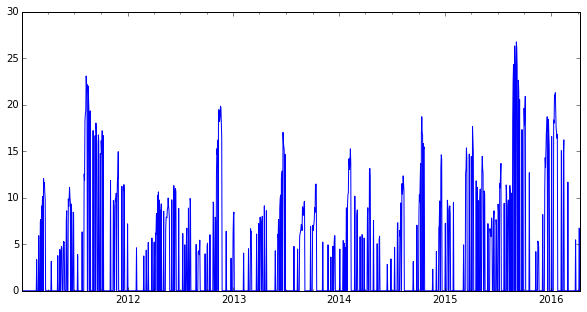

In [166]:

vola = d_slice.exo.shift(1) - d_slice.exo.shift(2)
volatility_metric = ATR(d_slice.exo,d_slice.exo,d_slice.exo,10)

values_a = []
index_a = []

# Set days in positions here, this value can be optimized
days_in_position = 5

for i in range(1, len(equity)):
    #
    # on opening of new position, we calculate position size
    #
    if inposition[i] == 1 and inposition[i - 1] == 0:
        current_position_size = volatility_metric[i]
        
    elif inposition[i] == 1 and inposition[i - days_in_position] == 1:
        current_position_size = volatility_metric[i]
        
    else:
        current_position_size = 0
        
    values_a.append(current_position_size)
    index_a.append(equity.index[i])

possize_dynamic_vola_atr = pd.Series(values_a, index=[index_a])
possize_dynamic_vola_atr.plot()

#### Comparing equities

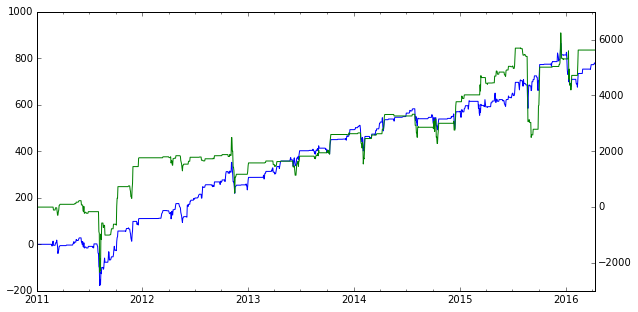

In [170]:
#X axis is initial equity curve
#Colored blue
x=equity
x.plot()

#Y axis is equity curve with position management
#Colored green
y=pl*possize_dynamic_vola_atr
y.dropna().cumsum().plot(secondary_y=True)

## Equity based

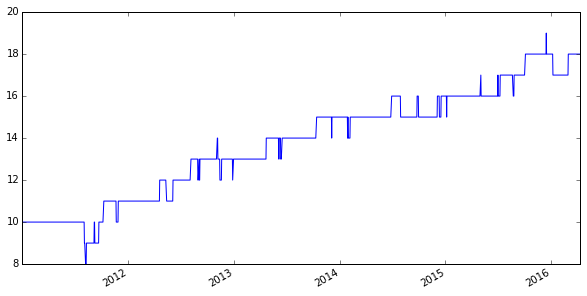

In [168]:
# Contracts per n$

values_a = []
index_a = []

pnl = pl

first_index = pnl.index[0]
initial_deposit = pd.Series(1000, index=[first_index + pd.DateOffset(days=-1)])

pnl = pnl.append(initial_deposit)
pnl = pnl.sort_index()

_equity = pnl.cumsum()

for i in range(0, len(_equity)):
    #
    # on opening of new position, we calculate position size
    #
    current_position_size = round(_equity[i] / 100)

    values_a.append(current_position_size)
    index_a.append(_equity.index[i])

possize_equity = pd.Series(values_a, index=[index_a])
possize_equity.plot()


#### Comparing equities

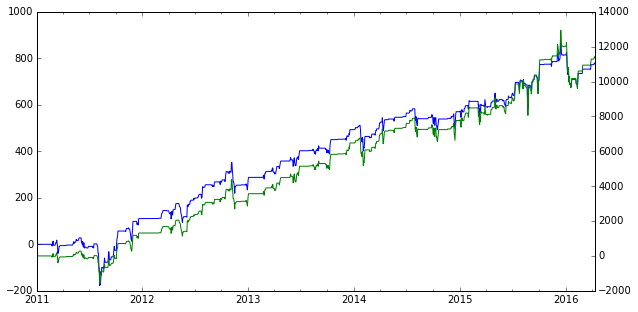

In [169]:
#X axis is initial equity curve
#Colored blue
x=equity
x.plot()

#Y axis is equity curve with position management
#Colored green
y=pl*possize_equity
y.dropna().cumsum().plot(secondary_y=True)

## Percent risk 

#### We need to determine stop-loss level to calculate position size. It may be trailing stop or Fixed value or?

## System risk weighting

max DD -0.628462213929


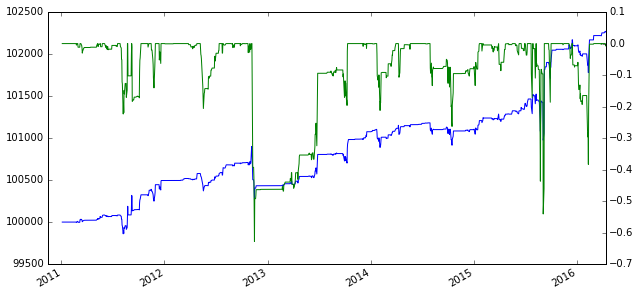

In [253]:
#
# 1. Set deposit size
#
first_index = pnl.index[0]
initial_deposit = pd.Series(100000, index=[first_index + pd.DateOffset(days=-1)])
#
# 2. Set system PnL
#
system_pnl = pl*possize_vola_median
#
# 3. Set risk value in percents
#
risk_value = 3  # Percent
#
# 4. Adding initial deposit 
#
pnl = system_pnl
pnl = pnl.append(initial_deposit)
pnl = pnl.sort_index()

_equity = pnl.cumsum()
#
# 5. Calculating absolute and relative Drawdown
#
dd = (_equity - _equity.expanding().max())
dd_percent = ((_equity - _equity.expanding().max()) / _equity.expanding().max()) * 100

_equity.plot()
dd_percent.plot(secondary_y=True)
#
# 6. Getting value of max DD in percents.
#
min_dd_percent = dd_percent.min() # !!! Looks into future, it is ok for raw exploration
#
# 7. Getting system weight multiplier. 
#
system_portfolio_weight = abs(risk_value / min_dd_percent)

print('max DD', dd_percent.min())

system weight 4.77355668091
max DD -2.90228396175


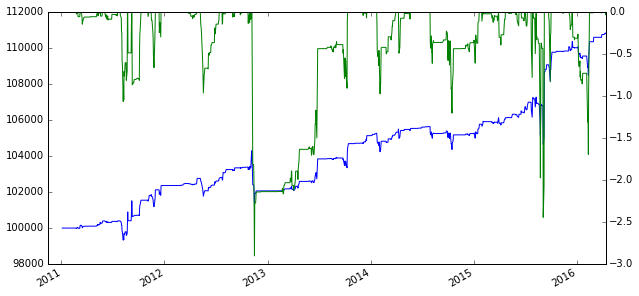

In [254]:
#
# 8. Multiply vola adjusted PnL on system weight. 
#    And after all we get adequate position size for this system which traded on 100k usd depo
#    But weight is fixed.
#
system_pnl = (pl*possize_vola_median) * system_portfolio_weight

pnl = system_pnl
pnl = pnl.append(initial_deposit)
pnl = pnl.sort_index()

_equity = pnl.cumsum()

dd = (_equity - _equity.expanding().max())
dd_percent = ((_equity - _equity.expanding().max()) / _equity.expanding().max()) * 100

_equity.plot()
dd_percent.plot(secondary_y=True)

print('system weight', system_portfolio_size)
print('max DD', dd_percent.min())

In [191]:
initial_deposit[0]

10000

In [9]:
pnl = -pl

#first_index = pnl.index[0]
#initial_deposit = pd.Series(1000, index=[first_index + pd.DateOffset(days=-1)])

#pnl = pnl.append(initial_deposit)
#pnl = pnl.sort_index()

_equity = pnl.cumsum()+100
_equity

2011-01-03    100.00
2011-01-04    100.00
2011-01-05    100.00
2011-01-06    100.00
2011-01-07    100.00
2011-01-10    100.00
2011-01-11    100.00
2011-01-12    100.00
2011-01-13    100.00
2011-01-14    100.00
2011-01-17    100.00
2011-01-18    100.00
2011-01-19    100.00
2011-01-20    100.00
2011-01-21    100.00
2011-01-24    100.00
2011-01-25    100.00
2011-01-26    100.00
2011-01-27    100.00
2011-01-28    100.00
2011-01-31    100.00
2011-02-01    100.00
2011-02-02    100.00
2011-02-03    100.00
2011-02-04    100.00
2011-02-07    100.00
2011-02-08    100.00
2011-02-09    100.00
2011-02-10    100.00
2011-02-11    100.00
               ...  
2016-03-02   -653.50
2016-03-03   -653.50
2016-03-04   -653.50
2016-03-07   -653.50
2016-03-08   -653.50
2016-03-09   -653.50
2016-03-10   -653.50
2016-03-11   -653.50
2016-03-14   -653.50
2016-03-15   -653.50
2016-03-16   -653.50
2016-03-17   -653.50
2016-03-18   -653.50
2016-03-21   -653.50
2016-03-22   -653.50
2016-03-23   -653.50
2016-03-24   